In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.signal import butter
import numpy as np

In [115]:
df=pd.read_table('./left_12_middle_O_right_17_이/Rawdata.txt',sep='\t',encoding='cp949')
# 1분 가운데->1분 12봄->1분 가운데->1분 17 봄

In [116]:
df

,Time,EEG_Fp1,EEG_Fp2,PPG
0,오후 3:57:27.660,0.000006,0.000075,0.000974
1,오후 3:57:27.660,0.000006,0.000068,0.000971
2,오후 3:57:27.661,0.000013,0.000077,0.000967
3,오후 3:57:27.661,0.000006,0.000074,0.000964
4,오후 3:57:27.667,0.000008,0.000075,0.000959
...,...,...,...,...
56559,오후 4:01:30.458,0.000032,0.000030,0.000901
56560,오후 4:01:30.462,0.000035,0.000032,0.000901
56561,오후 4:01:30.462,0.000038,0.000039,0.000901
56562,오후 4:01:30.472,0.000033,0.000048,0.000902


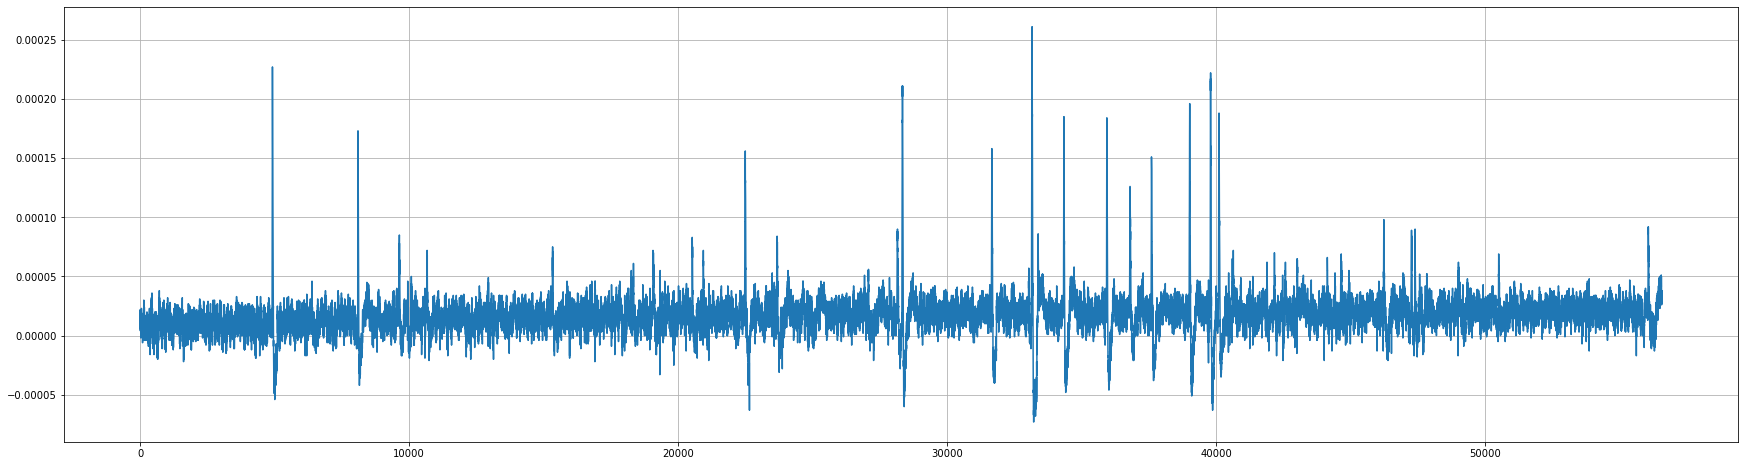

In [117]:
%matplotlib inline
plt.rcParams["figure.figsize"]=(30,8)
plt.rcParams["lines.color"]='b'
plt.rcParams['axes.grid']=True
plt.plot(df['EEG_Fp1'])
plt.show()

In [118]:
#https://alice-secreta.tistory.com/23
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = sig.lfilter(b, a, data)
    return y

_12hz=[]
trial=0
while(trial<len(df)):
    try:
        z=df['EEG_Fp1'][trial:trial+7680] #256*30, 30초씩 부름
    except: #30개 못불러옴
        break
    z=z.reset_index(drop=False,inplace=False) #index 초기화
    del z['index']

    Fs=256
    Ts=1/Fs
    N=len(z)
    k=np.arange(N)
    T=N/Fs
    freq=k/T
    freq=freq[range(int(N/2))]


    # BPF setting 
    lowcut = 11.5
    highcut = 13.0

    # BPF
    yy = butter_bandpass_filter(z['EEG_Fp1'].values, lowcut, highcut, Fs, order=5)
    plt.rcParams["figure.figsize"]=(15,3)

    # 필터 적용된 FFT Plot
    yf = np.fft.fft(yy) / N
    yf = yf[range(int(N/2))]

    _12hz.append(sum(abs(yf)[500:530])/31)

    #plt.title("BPF")
    #plt.plot(freq, abs(yf), 'k')
    #plt.xlim(0, Fs / 5)
    #plt.show()
    trial+=256 #1초씩 넘김

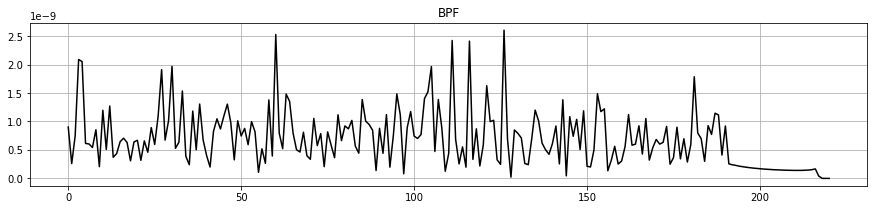

In [125]:
plt.title("BPF")
plt.plot(_12hz, 'k')
plt.show()

- 직접 FFT하는거보다 FFT된거에서 가져오자..!